<a href="https://colab.research.google.com/github/3-hWnG/My-DAP/blob/main/Lab_part2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [171]:
wine_url = 'https://raw.githubusercontent.com/lenhattung/SP26-AI1904-DAP391m/refs/heads/main/lab_part_2/01%20-%20Linear%20and%20logistic%20regression/wines.csv'
titanic_url = 'https://raw.githubusercontent.com/lenhattung/SP26-AI1904-DAP391m/refs/heads/main/lab_part_2/01%20-%20Linear%20and%20logistic%20regression/titanic.csv'
wine = pd.read_csv(wine_url)
titanic = pd.read_csv(titanic_url)


In [172]:
display(wine.head())
display(titanic.head())

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,5


,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# **2.1**

In [173]:
mod = sm.OLS(wine["quality"], wine[["fixed_acidity",  "volatile_acidity", "citric_acid", "residual_sugar",
                  "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
                  "pH", "sulphates", "alcohol"]])
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          3.710e+04
Date:                Tue, 13 Jan 2026   Prob (F-statistic):                        0.00
Time:                        08:10:20   Log-Likelihood:                         -7226.4
No. Observations:                6497   AIC:                                  1.447e+04
Df Residuals:                    6486   BIC:                                  1.455e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed_acidity            0.0100      0.010      1.047      0.295      -0.009       0.029
volatile_acidity        -1.4573      0.072    -20.130      0.000      -1.599      -1.315
citric_acid             -0.1137      0.080     -1.426      0.154      -0.270       0.043
residual_sugar           0.0221      0.002      9.259      0.000       0.017       0.027
chlorides               -0.7955      0.326     -2.436      0.015      -1.436      -0.155
free_sulfur_dioxide      0.0060      0.001      7.966      0.000       0.005       0.007
total_sulfur_dioxide    -0.0022      0.000     -8.228      0.000      -0.003      -0.002
density                  1.9225      0.281      6.837      0.000       1.371       2.474
pH                       0.1641      0.069      2.384      0.017       0.029       0.299
sulphates                0.6408      0.071      8.998      0.000       0.501       0.780
alcohol                  0.3333      0.009     37.212      0.000       0.316       0.351
==============================================================================
Omnibus:                      140.142   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.565
Skew:                           0.010   Prob(JB):                     2.21e-68
Kurtosis:                       4.073   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

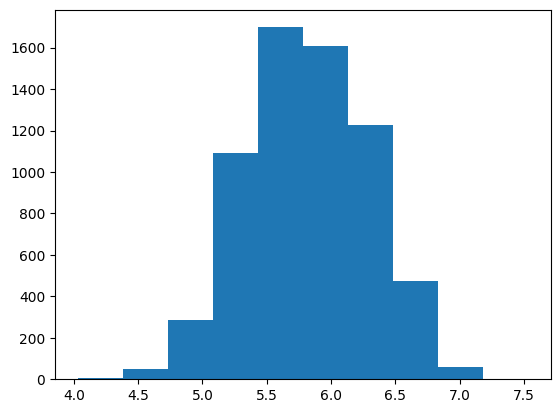

In [174]:
plt.hist(res.predict())
plt.show()

#2.2

In [175]:
import statsmodels.formula.api as smf

In [176]:
cols = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
titanic.fillna({'age': titanic['age'].mean(), 'fare': titanic['fare'].mean()}, inplace=True)
titanic_clean = titanic[cols].copy()
titanic_clean.dropna(inplace=True)
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1309 non-null   int64  
 1   pclass        1309 non-null   int64  
 2   survived      1309 non-null   int64  
 3   name          1309 non-null   object 
 4   sex           1309 non-null   int64  
 5   age           1309 non-null   float64
 6   sibsp         1309 non-null   int64  
 7   parch         1309 non-null   int64  
 8   ticket        1309 non-null   object 
 9   fare          1309 non-null   float64
 10  cabin         295 non-null    object 
 11  embarked      1307 non-null   object 
 12  boat          486 non-null    object 
 13  body          121 non-null    float64
 14  home.dest     745 non-null    object 
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


In [177]:
formula = 'survived ~ C(pclass) + sex + age + sibsp + parch + fare'
model_logit = smf.logit(formula=formula, data=titanic_clean)
results_logit = model_logit.fit()
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.461882
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1309
Model:                          Logit   Df Residuals:                     1301
Method:                           MLE   Df Model:                            7
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                  0.3055
Time:                        08:10:20   Log-Likelihood:                -604.60
converged:                       True   LL-Null:                       -870.51
Covariance Type:            nonrobust   LLR p-value:                1.152e-110
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.9711      0.318      3.050      0.002       0.347       1.595
C(pclass)[T.2]   

In [178]:
print(np.exp(results_logit.params))

Intercept          2.640892
C(pclass)[T.2]     0.325385
C(pclass)[T.3]     0.132486
sex               13.365288
age                0.963758
sibsp              0.718842
parch              0.966538
fare               1.002260
dtype: float64


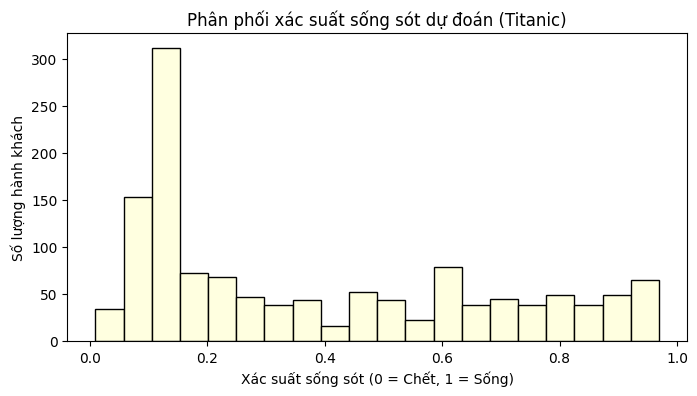

In [179]:
probs = results_logit.predict()

plt.figure(figsize=(8, 4))
plt.hist(probs, bins=20, color='lightyellow', edgecolor='black')
plt.title('Phân phối xác suất sống sót dự đoán (Titanic)')
plt.xlabel('Xác suất sống sót (0 = Chết, 1 = Sống)')
plt.ylabel('Số lượng hành khách')
plt.show()

#**2.3**

In [180]:
from sklearn.metrics import confusion_matrix

In [181]:
formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'
model_mn = smf.mnlogit(formula=formula, data=wine)

# method='bfgs': Thuật toán tối ưu hóa mạnh mẽ hơn mặc định, giúp tránh lỗi không hội tụ
# maxiter=100: Cho phép máy tính thử nhiều lần hơn để tìm kết quả tốt nhất
result_mn = model_mn.fit(method='bfgs', maxiter=5000)
print(result_mn.summary())



Optimization terminated successfully.
         Current function value: 1.058007
         Iterations: 758
         Function evaluations: 771
         Gradient evaluations: 771
                          MNLogit Regression Results                          
Dep. Variable:                quality   No. Observations:                 6497
Model:                        MNLogit   Df Residuals:                     6419
Method:                           MLE   Df Model:                           72
Date:                Tue, 13 Jan 2026   Pseudo R-squ.:                  0.1694
Time:                        08:10:25   Log-Likelihood:                -6873.9
converged:                       True   LL-Null:                       -8275.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
           quality=4       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept      

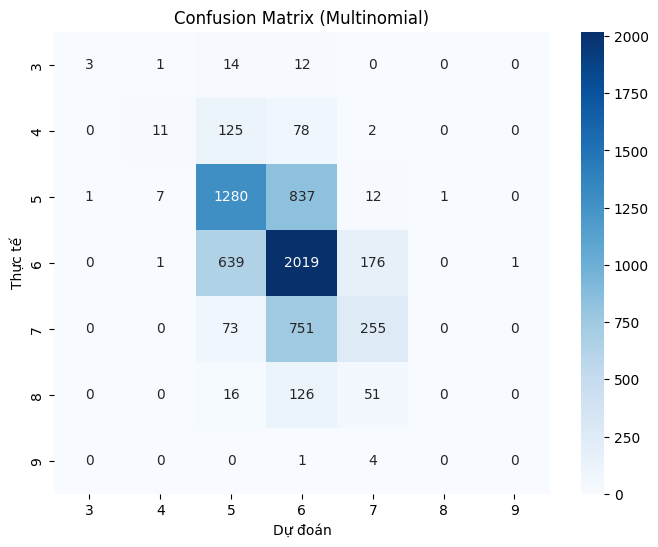

In [182]:
pred_labels = result_mn.predict().argmax(axis=1)
actual_labels = wine['quality']
pred_labels_mapped = pred_labels + wine['quality'].min()
cm = confusion_matrix(actual_labels, pred_labels_mapped)

plt.figure(figsize=(8, 6))
# Vẽ Heatmap: annot=True để hiện số lên ô
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(wine['quality'].unique()),
            yticklabels=sorted(wine['quality'].unique()))

plt.title("Confusion Matrix (Multinomial)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()